### Erik Vizcaino

# **Final Project**

# Table of Contents
### 1. Business Understanding
### 2. Data Understanding
### 3. Data Preparation
### 4. Business Intelligence
### 5. Correlation Analysis
### 6. Regression
### 7. Classification
### 8. Clustering
### 9. Storytelling
*On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.*

### 1. Business Understanding
    - Our team will work with a movie dataset in order to predict which movies typically fail.
    - We want to inform our investors which movies to avoid and also provide reasoning as to why they fail.
    - Currently, many movies are being made that never recover the budgeted amount resulting in a negative investment.
         *Analysis will be given after and along with a series of data techniques to reach our goal*
    - Goal:
        Objective: Find what could indicate a positive movie reception and earnings. 
        Subjective: Are any markets available, not clearly shown in the data? Determine what other data would be needed.
    - Problems:
        IMDB reviewers may not fairly represent the current movie going market. According to the Motion Picture
        Association of America, 52% of movie goers are female. However, in line with IMDB scores, previous
        research from fivethirtyeight has noted male preference won out about 85 percent of the time when determining
        and IMDB score. For this reason, identifying market investments may not be the most sound. The graphics below
        illustrate this.
        

In [123]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://notebooks.azure.com/evizcaino/libraries/midtermproject1/raw/GenderMovies.JPG")

In [23]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://notebooks.azure.com/evizcaino/libraries/midtermproject1/raw/imdbgenderratings.png")

### 2. Data Understanding
    - This process will collect the raw movie data and describe what we will be working with.

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ensemble classifiers
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

#pip install scikit-plot (optional)
!pip install scikit-plot

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


  Running setup.py bdist_wheel for scikit-plot ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/a7/ac/fe/750d7565f5d867f9fd82b2408a76a6170d21ef0628d30502ec
Successfully built scikit-plot


In [4]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


##### Takeaways: 
            -Average IMDB Score is 6.44 (Not 5)
            -We have incomplete data
            -Average movie is 107 minutes long
            

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

**Numerical columns**: Number of critical reviews, duration, facebook likes(director, actors, cast, movie), gross earnings, 
            voted users, actor featured in poster, budget, year, imdb score, aspect ratio.

**Categorial columns**: color, names, genre, title, plot keywords, link, language, country, content rating
- 5043 entries but 21 variables are missing at least one entry. In our data preparation, we will take out all
    entries that do not contain a gross earnings. From there, we will continue to emphasize varaibles that keep with our goals. 

In [7]:
pd.get_dummies(df, columns=["content_rating"]).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-MA,content_rating_TV-PG,content_rating_TV-Y,content_rating_TV-Y7,content_rating_Unrated,content_rating_X
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,1.78,33000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,2.35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,245000000.0,2015.0,393.0,6.8,2.35,85000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df['genres'] = df['genres'].str.replace('|', ',')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"Action,Adventure,Fantasy,Sci-Fi",CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"Action,Adventure,Fantasy",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"Action,Adventure,Thriller",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"Action,Thriller",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [9]:
df['genres'] = df['genres'].str.split(',')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [10]:
df1 = df['genres'].str.join('|').str.get_dummies()
df1.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df.drop(['genres'], axis=1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower|tower,http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|captain america|marvel cinematic universe|superhero,http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_tt_tt_1,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [12]:
df= df.join(df1)
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


AxesSubplot(0.125,0.125;0.775x0.755)
count    5043.000000
mean     6.442138   
std      1.125116   
min      1.600000   
25%      5.800000   
50%      6.600000   
75%      7.200000   
max      9.500000   
Name: imdb_score, dtype: float64


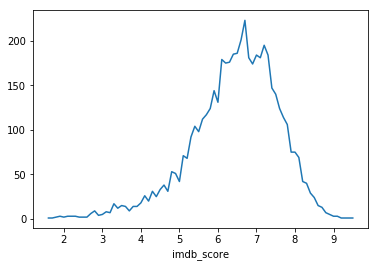

In [13]:
print df.groupby('imdb_score').size().plot()
print df['imdb_score'].describe()

- This graphic gives a brief take on the data we will be working with. 

### 3. Data Preparation
    - In this step, cleaning and transforming will need to be done before formal analysis can take place.
    We will determine which data is necessary to keep, clean it, contruct new data if needed, integrate data 
    and finally format it for business intelligence models. 

- Dropping Useless Columns

In [14]:
df = df.drop('genres', axis=1)

-The genre category has many that overlap with one another and therefore would not be useful for our analysis.

In [15]:
df = df.drop('plot_keywords', axis=1)

In [16]:
df = df.drop('aspect_ratio', axis=1)

In [17]:
df = df.drop('country', axis=1)

In [18]:
df = df.drop('movie_imdb_link', axis=1)

print "We may drop more as our analysis proves we do not need them"

We may drop more as our analysis proves we do not need them


- Combining Columns

In [19]:
df['facebook_likes'] = df['director_facebook_likes'] + df['actor_1_facebook_likes'] + df['actor_2_facebook_likes'] + df['actor_3_facebook_likes'] + df['movie_facebook_likes']
print df['facebook_likes'].describe()
print df['cast_total_facebook_likes'].describe()

count    4919.000000  
mean     17315.651149 
std      29524.248109 
min      0.000000     
25%      1691.500000  
50%      3768.000000  
75%      22361.000000 
max      655285.000000
Name: facebook_likes, dtype: float64
count    5043.000000  
mean     9699.063851  
std      18163.799124 
min      0.000000     
25%      1411.000000  
50%      3090.000000  
75%      13756.500000 
max      656730.000000
Name: cast_total_facebook_likes, dtype: float64


In my analysis I will focus on the total facebook likes when needed. However, in potentially finding 
the best combination for a film, all varaibles will be kept. 

In [20]:
df['roi'] = (df['gross']-df['budget']) / df['budget'] * 100
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,PG-13,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,96554.0,-18.337071
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,259000.0,79.252257
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


The new category "roi" will be a better judge of success of an investment. Return on Investment will take into 
consideration risk when configuring success of a movie. 

- Dropping incomplete/inconsistent data

In [21]:
df.isnull().sum()

color                        19  
director_name                104 
num_critic_for_reviews       50  
duration                     15  
director_facebook_likes      104 
actor_3_facebook_likes       23  
actor_2_name                 13  
actor_1_facebook_likes       7   
gross                        884 
actor_1_name                 7   
movie_title                  0   
num_voted_users              0   
cast_total_facebook_likes    0   
actor_3_name                 23  
facenumber_in_poster         13  
num_user_for_reviews         21  
language                     12  
content_rating               303 
budget                       492 
title_year                   108 
actor_2_facebook_likes       13  
imdb_score                   0   
movie_facebook_likes         0   
Action                       0   
Adventure                    0   
Animation                    0   
Biography                    0   
Comedy                       0   
Crime                        0   
Documentary   

In [22]:
df['gross'].replace('', np.nan, inplace=True)
print df.head()


   color      director_name  num_critic_for_reviews  duration  \
0  Color  James Cameron      723.0                   178.0      
1  Color  Gore Verbinski     302.0                   169.0      
2  Color  Sam Mendes         602.0                   148.0      
3  Color  Christopher Nolan  813.0                   164.0      
4  NaN    Doug Walker       NaN                     NaN         

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0  0.0                      855.0                   Joel David Moore   
1  563.0                    1000.0                  Orlando Bloom      
2  0.0                      161.0                   Rory Kinnear       
3  22000.0                  23000.0                 Christian Bale     
4  131.0                   NaN                      Rob Walker         

   actor_1_facebook_likes        gross     actor_1_name  \
0  1000.0                  760505847.0  CCH Pounder       
1  40000.0                 309404152.0  Johnny Depp       

In [23]:
df.dropna(subset=['gross'], inplace=True)
print df.head()

   color      director_name  num_critic_for_reviews  duration  \
0  Color  James Cameron      723.0                   178.0      
1  Color  Gore Verbinski     302.0                   169.0      
2  Color  Sam Mendes         602.0                   148.0      
3  Color  Christopher Nolan  813.0                   164.0      
5  Color  Andrew Stanton     462.0                   132.0      

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0  0.0                      855.0                   Joel David Moore   
1  563.0                    1000.0                  Orlando Bloom      
2  0.0                      161.0                   Rory Kinnear       
3  22000.0                  23000.0                 Christian Bale     
5  475.0                    530.0                   Samantha Morton    

   actor_1_facebook_likes        gross     actor_1_name  \
0  1000.0                  760505847.0  CCH Pounder       
1  40000.0                 309404152.0  Johnny Depp       

In [24]:
df.isnull().sum()

color                        2  
director_name                3  
num_critic_for_reviews       3  
duration                     2  
director_facebook_likes      3  
actor_3_facebook_likes       13 
actor_2_name                 6  
actor_1_facebook_likes       4  
gross                        0  
actor_1_name                 4  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 13 
facenumber_in_poster         7  
num_user_for_reviews         1  
language                     3  
content_rating               64 
budget                       268
title_year                   3  
actor_2_facebook_likes       6  
imdb_score                   0  
movie_facebook_likes         0  
Action                       0  
Adventure                    0  
Animation                    0  
Biography                    0  
Comedy                       0  
Crime                        0  
Documentary                  0  
Drama     

In [25]:
df['budget'].replace('', np.nan, inplace=True)
print df.head()

   color      director_name  num_critic_for_reviews  duration  \
0  Color  James Cameron      723.0                   178.0      
1  Color  Gore Verbinski     302.0                   169.0      
2  Color  Sam Mendes         602.0                   148.0      
3  Color  Christopher Nolan  813.0                   164.0      
5  Color  Andrew Stanton     462.0                   132.0      

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0  0.0                      855.0                   Joel David Moore   
1  563.0                    1000.0                  Orlando Bloom      
2  0.0                      161.0                   Rory Kinnear       
3  22000.0                  23000.0                 Christian Bale     
5  475.0                    530.0                   Samantha Morton    

   actor_1_facebook_likes        gross     actor_1_name  \
0  1000.0                  760505847.0  CCH Pounder       
1  40000.0                 309404152.0  Johnny Depp       

In [26]:
df.dropna(subset=['budget'], inplace=True)
print df.head()

   color      director_name  num_critic_for_reviews  duration  \
0  Color  James Cameron      723.0                   178.0      
1  Color  Gore Verbinski     302.0                   169.0      
2  Color  Sam Mendes         602.0                   148.0      
3  Color  Christopher Nolan  813.0                   164.0      
5  Color  Andrew Stanton     462.0                   132.0      

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0  0.0                      855.0                   Joel David Moore   
1  563.0                    1000.0                  Orlando Bloom      
2  0.0                      161.0                   Rory Kinnear       
3  22000.0                  23000.0                 Christian Bale     
5  475.0                    530.0                   Samantha Morton    

   actor_1_facebook_likes        gross     actor_1_name  \
0  1000.0                  760505847.0  CCH Pounder       
1  40000.0                 309404152.0  Johnny Depp       

In [27]:
df.isnull().sum()

color                        2 
director_name                0 
num_critic_for_reviews       1 
duration                     1 
director_facebook_likes      0 
actor_3_facebook_likes       10
actor_2_name                 5 
actor_1_facebook_likes       3 
gross                        0 
actor_1_name                 3 
movie_title                  0 
num_voted_users              0 
cast_total_facebook_likes    0 
actor_3_name                 10
facenumber_in_poster         6 
num_user_for_reviews         0 
language                     3 
content_rating               51
budget                       0 
title_year                   0 
actor_2_facebook_likes       5 
imdb_score                   0 
movie_facebook_likes         0 
Action                       0 
Adventure                    0 
Animation                    0 
Biography                    0 
Comedy                       0 
Crime                        0 
Documentary                  0 
Drama                        0 
Family  

For what we will be working with, our data has removed all that is necessary to move forward and view values.

In [28]:
df['imdb_tier'] = pd.qcut(df['imdb_score'], 5)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,imdb_tier
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,"(7.3, 9.3]"
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,"(6.8, 7.3]"
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,PG-13,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,96554.0,-18.337071,"(6.3, 6.8]"
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,259000.0,79.252257,"(7.3, 9.3]"
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,PG-13,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,26277.0,-72.294775,"(6.3, 6.8]"


In [29]:
# Creating these catorgies based off of random numbers is inadequate for categories. 
# These categories should be based in relation to one another. Therefore, we will use the bins creating by uniformity. *See next entry*
df['category'] = 1
df['category'][(df['imdb_score'] >= 4) & (df['imdb_score'] <= 6)] = 2
df['category'][(df['imdb_score'] > 6) & (df['imdb_score'] <= 8)] = 3
df['category'][df['imdb_score'] > 8] = 4

df.head(2)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,imdb_tier,category
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,"(7.3, 9.3]",3
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,"(6.8, 7.3]",3


In [30]:
df['category'][(df['imdb_score'] >= 1.599) & (df['imdb_score'] <= 5.7)] = 1
df['category'][(df['imdb_score'] > 5.7) & (df['imdb_score'] <= 6.3)] = 2
df['category'][(df['imdb_score'] > 6.3) & (df['imdb_score'] <= 6.8)] = 3
df['category'][(df['imdb_score'] > 6.8) & (df['imdb_score'] <= 7.3)] = 4
df['category'][(df['imdb_score'] > 7.3) & (df['imdb_score'] <= 9.3)] = 5

df.head(2)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anacond

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,imdb_tier,category
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,"(7.3, 9.3]",5
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,"(6.8, 7.3]",4


In [31]:
# This cell shows the values by tier
df.groupby('imdb_tier').count()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,category
imdb_tier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(1.599, 5.7]",851,851,850,850,851,851,851,851,851,851,851,851,851,851,850,851,850,845,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851
"(5.7, 6.3]",756,758,758,758,758,757,758,758,758,758,758,758,758,757,754,758,757,749,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,757,758,758
"(6.3, 6.8]",808,808,808,808,808,806,808,808,808,808,808,808,808,806,808,808,808,802,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,806,808,808
"(6.8, 7.3]",721,721,721,721,721,718,718,720,721,720,721,721,721,718,721,721,720,701,721,721,718,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,718,721,721
"(7.3, 9.3]",753,753,753,753,753,749,751,751,753,751,753,753,753,749,752,753,753,743,753,753,751,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,749,753,753


In [32]:
df.groupby('category').count()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,imdb_tier
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,851,851,850,850,851,851,851,851,851,851,851,851,851,851,850,851,850,845,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851
2,756,758,758,758,758,757,758,758,758,758,758,758,758,757,754,758,757,749,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,757,758,758
3,808,808,808,808,808,806,808,808,808,808,808,808,808,806,808,808,808,802,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,808,806,808,808
4,721,721,721,721,721,718,718,720,721,720,721,721,721,718,721,721,720,701,721,721,718,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,721,718,721,721
5,753,753,753,753,753,749,751,751,753,751,753,753,753,749,752,753,753,743,753,753,751,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,749,753,753


In [33]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,imdb_tier,category
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,"(7.3, 9.3]",5
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,"(6.8, 7.3]",4
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,PG-13,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,96554.0,-18.337071,"(6.3, 6.8]",3
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,259000.0,79.252257,"(7.3, 9.3]",5
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,PG-13,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,26277.0,-72.294775,"(6.3, 6.8]",3


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 53 columns):
color                        3889 non-null object
director_name                3891 non-null object
num_critic_for_reviews       3890 non-null float64
duration                     3890 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3881 non-null float64
actor_2_name                 3886 non-null object
actor_1_facebook_likes       3888 non-null float64
gross                        3891 non-null float64
actor_1_name                 3888 non-null object
movie_title                  3891 non-null object
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
actor_3_name                 3881 non-null object
facenumber_in_poster         3885 non-null float64
num_user_for_reviews         3891 non-null float64
language                     3888 non-null object
content_rating               3840 non

In [35]:
df = pd.get_dummies(df, columns=["content_rating"])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 64 columns):
color                        3889 non-null object
director_name                3891 non-null object
num_critic_for_reviews       3890 non-null float64
duration                     3890 non-null float64
director_facebook_likes      3891 non-null float64
actor_3_facebook_likes       3881 non-null float64
actor_2_name                 3886 non-null object
actor_1_facebook_likes       3888 non-null float64
gross                        3891 non-null float64
actor_1_name                 3888 non-null object
movie_title                  3891 non-null object
num_voted_users              3891 non-null int64
cast_total_facebook_likes    3891 non-null int64
actor_3_name                 3881 non-null object
facenumber_in_poster         3885 non-null float64
num_user_for_reviews         3891 non-null float64
language                     3888 non-null object
budget                       3891 non

#### We added dummy variables to column variables content_rating, imdb_tiers, and category to ensure that we use the data in the most efficient way.

## 4. Business Intelligence
    - In this step, our goal from the course is to determine what variables would be good to predict
    the success of a movie. Aside from this, I would like to know which movies would be best to invest
    in. Because these are nearly synomous, be sure to look in the comments in case any differenations
    appear.

#### What have been the most successful movies? Least successful?

In [37]:
df.groupby('movie_title')['roi'].sum().sort_values(ascending=False).head(5)

movie_title
Paranormal Activity              719348.553333
Tarnation                        271466.055046
The Blair Witch Project          234116.856667
The Texas Chain Saw Massacre     73685.457070 
Halloween                        46700.000000 
Name: roi, dtype: float64

In [184]:
df.groupby('movie_title')['roi'].sum().sort_values(ascending=True).head()

movie_title
Victor Frankenstein    -256.698607
Pan                    -230.070364
Hero                   -199.451865
The Claim              -195.960680
Trance                 -176.808130
Name: roi, dtype: float64

-The most successful movie, Paranormal Activity had a return on investment of 719,348% and the least successfull 
was Victor Frankenstein at -256%.

-Many of the movies with high ROI are low budget vilms shot in "first-person".

#### Which movies have made the most money?

In [185]:
df.groupby('movie_title')['gross'].sum().sort_values(ascending=False).head()

movie_title
The Avengers            1.246559e+09
Avatar                  7.605058e+08
The Jungle Book         7.252903e+08
Spider-Man 3            6.730606e+08
Alice in Wonderland     6.683704e+08
Name: gross, dtype: float64

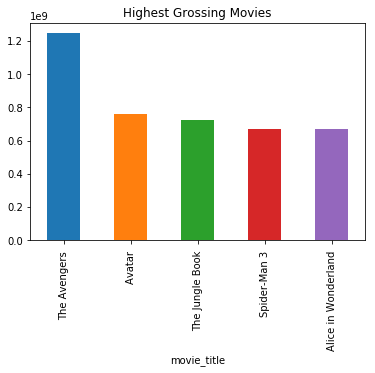

In [186]:
df.groupby('movie_title')['gross'].sum().sort_values(ascending=False).head().plot(kind='bar', title="Highest Grossing Movies")

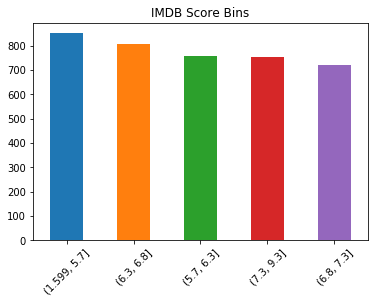

In [187]:
df.imdb_tier.value_counts().plot(kind='bar', rot=45, title= "IMDB Score Bins")

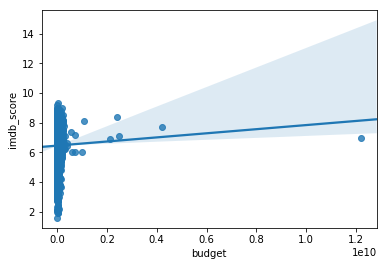

In [188]:
sns.regplot(x="budget", y="imdb_score", data=df)

-The graph shows a positive relationship between budget and the imdb score. This could be due to to quality films
being created with a high budget. Even with a bad plot, the graphics could make for an enjoyable film.

#### With the emergence of other forms of entertainment such as sports, are movies still making money?

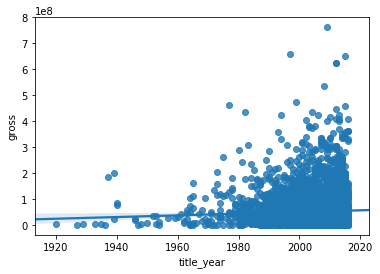

In [189]:
sns.regplot(x="title_year", y="gross", data=df)

- From looking at this database, it is clear to see movies are making more now than ever. However, it is important to remember that most of this sample are titles from recent years.

#### Does the IMDB score seem to change according to year?

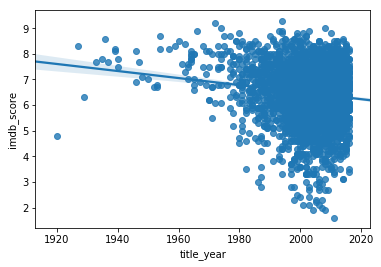

In [190]:
sns.regplot(x="title_year", y="imdb_score", data=df)

- A negative correlation is shown once again. The problem with the homogeniety of the sample appears once again. 

#### Does social media show any kind of relationship between the imdb score?

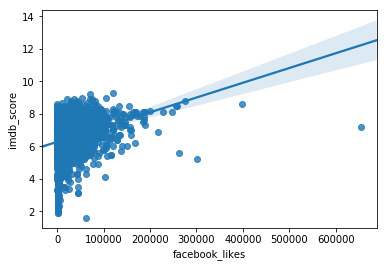

In [191]:
sns.regplot(x="facebook_likes", y="imdb_score", data=df)

- A positive relationship is shown here. These are all based off of recent facebook pages. It is helpful to know that facebook is a huge site to advertise on. 

#### Visualization of budget and gross earnings by the imdb score?

In [192]:
df['category'].value_counts()

1    851
3    808
2    758
5    753
4    721
Name: category, dtype: int64

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


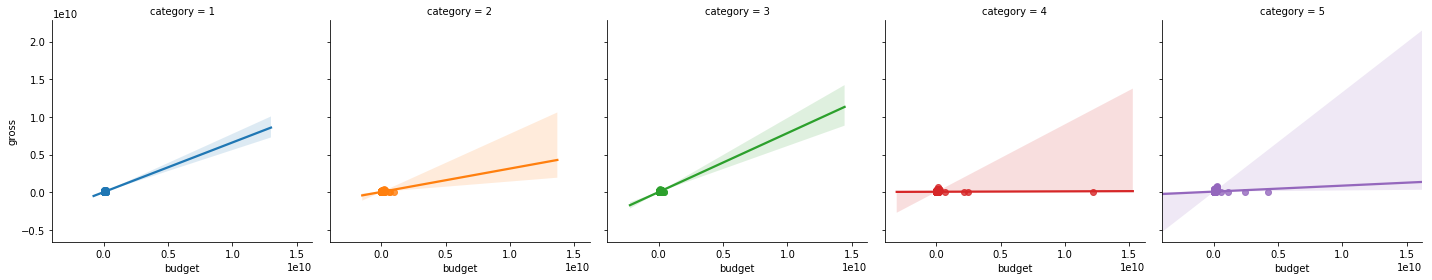

In [193]:
sns.lmplot("budget", "gross", df, col="category", hue="category", x_jitter=.7, size=4)

- The graphs above show that the steepest relationship between budget and gross earnings is the third imdb tier. This is where the average imdb score falls. 

#### Do certain lead actors seem to pay more? Are they received well?

In [194]:
df.groupby('actor_1_name')['budget'].size().sort_values(ascending=False).head(20)

actor_1_name
Robert De Niro       42
Johnny Depp          39
Nicolas Cage         31
J.K. Simmons         31
Denzel Washington    30
Bruce Willis         29
Matt Damon           29
Liam Neeson          27
Robin Williams       26
Robert Downey Jr.    26
Harrison Ford        25
Jason Statham        25
Keanu Reeves         24
Tom Hanks            24
Bill Murray          24
Tom Cruise           24
Steve Buscemi        24
Christian Bale       22
Morgan Freeman       22
Kevin Spacey         22
Name: budget, dtype: int64

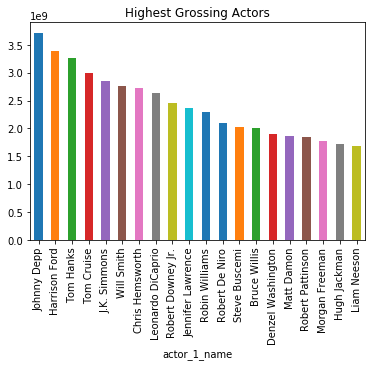

In [195]:
df.groupby('actor_1_name')['gross'].sum().sort_values(ascending=False).head(20).plot(kind='bar', title="Highest Grossing Actors")

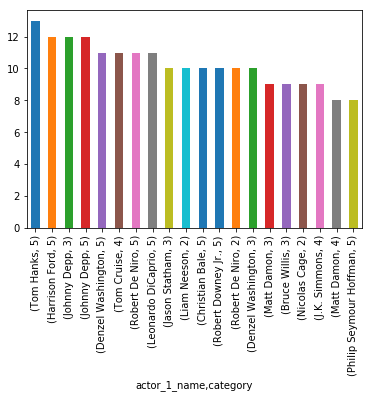

In [196]:
df.groupby('actor_1_name')['category'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

- Tom Hanks appears is the most highest rated movies. The top tier contains scores within 7.3 and 9.3. Following him are Harrison Ford and Johnny Depp. These actors have strong critical acclaim and are well received by the public. 

#### For good measure, we will look at the gross earning by country.
    - Current markets are opening and will be prime opportunites to movie franchises around the world. Highly populated areas
    such as India have Bollywood, but that does not mean there is not even more money to be made. 

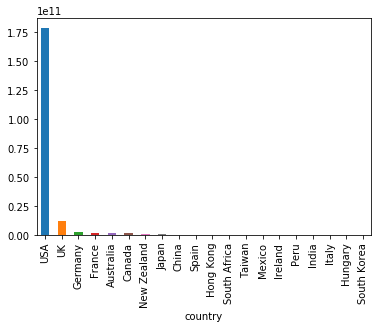

In [17]:
df.groupby('country')['gross'].sum().sort_values(ascending=False).head(20).plot(kind='bar')

- Most IMDB rated movies come from "The West", but emerging opportunities could be China, Hong Kong, and India. There are plenty of others and for that reason it is important to note possible changes over the next few decades. 

## 5. Correlation Analysis
    - This is an extension of the intelligence we gained before. What true relationships are there? After that
    can you determine critical insights for the client?

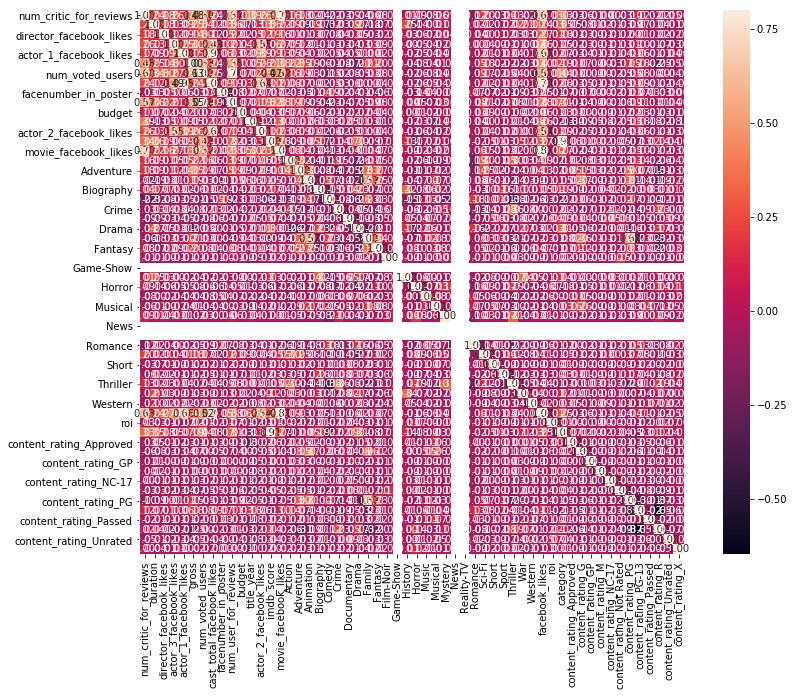

In [179]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".2f")

#### MESSY RIGHT?

In [37]:
imdb_corr = pd.DataFrame(df.corr()['imdb_score'].drop({'category','imdb_score'}))
imdb_corr.sort_values(['imdb_score'], ascending = False).head(9)

,imdb_score
num_voted_users,0.473209
duration,0.358253
num_critic_for_reviews,0.340219
num_user_for_reviews,0.320005
Drama,0.303740
movie_facebook_likes,0.277349
facebook_likes,0.270657
gross,0.211525
director_facebook_likes,0.189293


In [199]:
imdb_corr.sort_values(['imdb_score'], ascending = True).head(10)

,imdb_score
Comedy,-0.210520
Horror,-0.170958
content_rating_PG-13,-0.130274
title_year,-0.130236
Action,-0.094350
Family,-0.087168
facenumber_in_poster,-0.067941
content_rating_PG,-0.067834
Fantasy,-0.067496
Thriller,-0.051986


- Imdb score correlations:
    - number of critical reviews on imdb, duration, gross, number of people who voted for the movie, reviews,
    category, and facebook likes all have a strong positive correlation. 
        - A few takeaways can be made. Movies that are worth making, are typically longer. However, there is not a strong 
        correlation between duration and budget. More talk and interaction should be desired as shown by the correlations 
        between reviews and facebook likes. 
    - comedies and horror movies receive negative flak for their movies. Also, the newer a movie, the lower the score. 
- Investment minded correlations
    - roi does not provide any strong correlations with the imdb score. 
    - High gross earnings show a correlation with interactions as well. This includes, facebook, votes, and reviews. 
- Misc. Correlations
    - Duration and interactions have a few strong correlations. This includes reviews and votes. One reason may be due
    to the material in longer movies can allow the viewer more reasons to provide a review. If this in one way or another,
    provides a better imdb score, then that is worth dissecting. 
    -Cast total and Actor 1 facebook likes have a correlation of 95%. Something this strong may be due to the main actor
    getting too much of the facebook interactions. Since facebook interactions correlate with a high imdb score and gross
    earnings, I would encourage other cast to be active on social media in regards to the movie. 

## 6. Regression

In [38]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
df1 = df

In [40]:
df1 = df1.drop(['director_name'], axis =1)
df1 = df1.drop(['language'], axis =1)
df1 = df1.drop(['actor_1_name'], axis =1)
df1 = df1.drop(['actor_2_name'], axis =1)
df1 = df1.drop(['actor_3_name'], axis =1)
df1 = df1.drop(['color'], axis =1)
df1 = df1.drop(['movie_title'], axis =1)
df1 = df1.drop(['imdb_tier'], axis =1)
df1 = df1.drop(['gross', 'cast_total_facebook_likes','num_critic_for_reviews', 'num_voted_users', 'movie_facebook_likes'], axis=1)

- I removed these columns after realizing I will not need them for these steps in my model building or that they would be unavailable before a movie is shown.

In [41]:
#Remove empty data
df1 = df1.dropna()

In [42]:
df1.head(1)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,178.0,0.0,855.0,1000.0,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,5,0,0,0,0,0,0,0,1,0,0,0,0


In [43]:
#Full data?
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3874 entries, 0 to 5042
Data columns (total 51 columns):
duration                    3874 non-null float64
director_facebook_likes     3874 non-null float64
actor_3_facebook_likes      3874 non-null float64
actor_1_facebook_likes      3874 non-null float64
facenumber_in_poster        3874 non-null float64
num_user_for_reviews        3874 non-null float64
budget                      3874 non-null float64
title_year                  3874 non-null float64
actor_2_facebook_likes      3874 non-null float64
imdb_score                  3874 non-null float64
Action                      3874 non-null int64
Adventure                   3874 non-null int64
Animation                   3874 non-null int64
Biography                   3874 non-null int64
Comedy                      3874 non-null int64
Crime                       3874 non-null int64
Documentary                 3874 non-null int64
Drama                       3874 non-null int64
Family   

In [44]:
# Take the float away
df1['facebook_likes'] = df1['facebook_likes'].convert_objects(convert_numeric=True)
df1['roi'] = df1['roi'].convert_objects(convert_numeric=True)


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [45]:
# define X & y
y = df1['imdb_score']
X = df1.drop(['imdb_score', 'category'], axis =1)

### 6.1 Lasso 

In [47]:
model1 = lm.Lasso(alpha=.1, fit_intercept=True, normalize=False, random_state=None, max_iter=5e7)             #higher alpha (penality parameter), fewer predictors
model1.fit(X, y)
model1_y = model1.predict(X)

In [48]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 9.52318955e-03  1.51885991e-05 -4.80711378e-05 -7.89812361e-06
 -0.00000000e+00  4.14288895e-04 -7.48529725e-13 -1.64689124e-02
 -4.98237375e-06 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.30438285e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.06494517e-05
  5.05296136e-07  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
y-intercept  38.08076411286602


In [49]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '-0.000'),
 ('actor_1_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.000'),
 ('num_user_for_reviews', '0.000'),
 ('budget', '-0.000'),
 ('title_year', '-0.016'),
 ('actor_2_facebook_likes', '-0.000'),
 ('Action', '-0.000'),
 ('Adventure', '-0.000'),
 ('Animation', '0.000'),
 ('Biography', '0.000'),
 ('Comedy', '-0.000'),
 ('Crime', '0.000'),
 ('Documentary', '0.000'),
 ('Drama', '0.130'),
 ('Family', '-0.000'),
 ('Fantasy', '-0.000'),
 ('Film-Noir', '0.000'),
 ('Game-Show', '0.000'),
 ('History', '0.000'),
 ('Horror', '-0.000'),
 ('Music', '-0.000'),
 ('Musical', '0.000'),
 ('Mystery', '-0.000'),
 ('News', '0.000'),
 ('Reality-TV', '0.000'),
 ('Romance', '-0.000'),
 ('Sci-Fi', '-0.000'),
 ('Short', '0.000'),
 ('Sport', '0.000'),
 ('Thriller', '-0.000'),
 ('War', '0.000'),
 ('Western', '-0.000'),
 ('facebook_likes', '0.000'),
 ('roi', '0.000'),
 ('content_rating_Approved', '0.000'),
 ('

In [50]:
sorted(zip(coef, xcolumns), reverse=True)

[('0.130', 'Drama'),
 ('0.010', 'duration'),
 ('0.000', 'roi'),
 ('0.000', 'num_user_for_reviews'),
 ('0.000', 'facebook_likes'),
 ('0.000', 'director_facebook_likes'),
 ('0.000', 'content_rating_X'),
 ('0.000', 'content_rating_Unrated'),
 ('0.000', 'content_rating_R'),
 ('0.000', 'content_rating_Not Rated'),
 ('0.000', 'content_rating_M'),
 ('0.000', 'content_rating_G'),
 ('0.000', 'content_rating_Approved'),
 ('0.000', 'War'),
 ('0.000', 'Sport'),
 ('0.000', 'Short'),
 ('0.000', 'Reality-TV'),
 ('0.000', 'News'),
 ('0.000', 'Musical'),
 ('0.000', 'History'),
 ('0.000', 'Game-Show'),
 ('0.000', 'Film-Noir'),
 ('0.000', 'Documentary'),
 ('0.000', 'Crime'),
 ('0.000', 'Biography'),
 ('0.000', 'Animation'),
 ('-0.016', 'title_year'),
 ('-0.000', 'facenumber_in_poster'),
 ('-0.000', 'content_rating_Passed'),
 ('-0.000', 'content_rating_PG-13'),
 ('-0.000', 'content_rating_PG'),
 ('-0.000', 'content_rating_NC-17'),
 ('-0.000', 'content_rating_GP'),
 ('-0.000', 'budget'),
 ('-0.000', 'actor

In [51]:
a = zip(xcolumns, coef)
df2 = pd.DataFrame(a)
df2.sort_values(1, ascending=False)

,0,1
16,Drama,0.130
0,duration,0.010
33,War,0.000
21,History,0.000
1,director_facebook_likes,0.000
26,News,0.000
27,Reality-TV,0.000
30,Short,0.000
31,Sport,0.000
35,facebook_likes,0.000


In [52]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.8338925085127449
variance or r-squared:  0.2530978190218458


#### Genre proved to not have a measurable impact on this model. Although it may do great with business intelligence, it does not seem to be successful in building a regression model. I am taking genre out and starting Lasso over again.

In [53]:
# define X & y
y = df1['imdb_score']
X = df1[['duration', 'title_year' ,'num_user_for_reviews', 'Drama']]

In [54]:
model2 = lm.Lasso(alpha=.1, fit_intercept=True, normalize=False, random_state=None)             #higher alpha (penality parameter), fewer predictors
model2.fit(X, y)
model2_y = model2.predict(X)

In [55]:
print 'Coefficients: ', model2.coef_
print "y-intercept ", model2.intercept_

Coefficients:  [ 0.01128021 -0.00977813  0.00061778  0.13367526]
y-intercept  24.53846217104017


In [56]:
sorted(zip(coef, xcolumns), reverse=True)

[('0.130', 'Drama'),
 ('0.010', 'duration'),
 ('0.000', 'roi'),
 ('0.000', 'num_user_for_reviews'),
 ('0.000', 'facebook_likes'),
 ('0.000', 'director_facebook_likes'),
 ('0.000', 'content_rating_X'),
 ('0.000', 'content_rating_Unrated'),
 ('0.000', 'content_rating_R'),
 ('0.000', 'content_rating_Not Rated'),
 ('0.000', 'content_rating_M'),
 ('0.000', 'content_rating_G'),
 ('0.000', 'content_rating_Approved'),
 ('0.000', 'War'),
 ('0.000', 'Sport'),
 ('0.000', 'Short'),
 ('0.000', 'Reality-TV'),
 ('0.000', 'News'),
 ('0.000', 'Musical'),
 ('0.000', 'History'),
 ('0.000', 'Game-Show'),
 ('0.000', 'Film-Noir'),
 ('0.000', 'Documentary'),
 ('0.000', 'Crime'),
 ('0.000', 'Biography'),
 ('0.000', 'Animation'),
 ('-0.016', 'title_year'),
 ('-0.000', 'facenumber_in_poster'),
 ('-0.000', 'content_rating_Passed'),
 ('-0.000', 'content_rating_PG-13'),
 ('-0.000', 'content_rating_PG'),
 ('-0.000', 'content_rating_NC-17'),
 ('-0.000', 'content_rating_GP'),
 ('-0.000', 'budget'),
 ('-0.000', 'actor

In [57]:
a = zip(xcolumns, coef)
df2 = pd.DataFrame(a)
df2.sort_values(1, ascending=False)

,0,1
16,Drama,0.130
0,duration,0.010
33,War,0.000
21,History,0.000
1,director_facebook_likes,0.000
26,News,0.000
27,Reality-TV,0.000
30,Short,0.000
31,Sport,0.000
35,facebook_likes,0.000


In [58]:
print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.8833784259281622
variance or r-squared:  0.20877419305331346


### 6.2 Ridge

In [59]:
# define X & y
y = df1['imdb_score']
X = df1.drop(['imdb_score', 'category'], axis =1)

In [60]:
rig = lm.Ridge(alpha=0.9)             #higher alpha (penality parameter), fewer predictors
rig.fit(X, y)
rig_y = rig.predict(X)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.679484e-21
  overwrite_a=True).T


In [61]:
print 'Coefficients: ', rig.coef_
print "y-intercept ", rig.intercept_

Coefficients:  [ 6.34172828e-03  6.19605304e-06 -3.15557048e-05 -7.80525178e-06
 -1.24712140e-02  5.97299695e-04  6.03503402e-11 -1.88392043e-02
 -7.76279320e-06 -2.09585343e-01 -1.96134015e-02  9.44055349e-01
  2.26738388e-01 -1.47947365e-01  6.23055883e-02  7.48761019e-01
  4.01551319e-01 -2.09383187e-01 -7.68027011e-02 -1.78395443e-01
  0.00000000e+00  5.63405359e-02 -4.51353696e-01 -1.44392453e-01
 -1.37908359e-01  5.61655253e-02  0.00000000e+00  0.00000000e+00
 -6.66328762e-02 -1.21677575e-01  7.35649522e-01  9.07459464e-02
 -1.47092625e-01  2.33441376e-02 -1.48209120e-01  1.09101691e-05
 -2.62729295e-07  2.73576248e-02 -5.10108150e-01 -1.22079977e-01
 -5.83713484e-02 -5.58553820e-01  1.27477587e-01 -4.39430584e-01
 -5.41651322e-01 -2.78739938e-01 -2.35068009e-01 -2.55565194e-02
  5.11376082e-02]
y-intercept  43.53998994884371


In [62]:
coef = ["%.3f" % i for i in rig.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('duration', '0.006'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '-0.000'),
 ('actor_1_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.012'),
 ('num_user_for_reviews', '0.001'),
 ('budget', '0.000'),
 ('title_year', '-0.019'),
 ('actor_2_facebook_likes', '-0.000'),
 ('Action', '-0.210'),
 ('Adventure', '-0.020'),
 ('Animation', '0.944'),
 ('Biography', '0.227'),
 ('Comedy', '-0.148'),
 ('Crime', '0.062'),
 ('Documentary', '0.749'),
 ('Drama', '0.402'),
 ('Family', '-0.209'),
 ('Fantasy', '-0.077'),
 ('Film-Noir', '-0.178'),
 ('Game-Show', '0.000'),
 ('History', '0.056'),
 ('Horror', '-0.451'),
 ('Music', '-0.144'),
 ('Musical', '-0.138'),
 ('Mystery', '0.056'),
 ('News', '0.000'),
 ('Reality-TV', '0.000'),
 ('Romance', '-0.067'),
 ('Sci-Fi', '-0.122'),
 ('Short', '0.736'),
 ('Sport', '0.091'),
 ('Thriller', '-0.147'),
 ('War', '0.023'),
 ('Western', '-0.148'),
 ('facebook_likes', '0.000'),
 ('roi', '-0.000'),
 ('content_rating_Approved', '0.027'),
 (

In [63]:
sorted(zip(coef, xcolumns), reverse=True)

[('0.944', 'Animation'),
 ('0.749', 'Documentary'),
 ('0.736', 'Short'),
 ('0.402', 'Drama'),
 ('0.227', 'Biography'),
 ('0.127', 'content_rating_Not Rated'),
 ('0.091', 'Sport'),
 ('0.062', 'Crime'),
 ('0.056', 'Mystery'),
 ('0.056', 'History'),
 ('0.051', 'content_rating_X'),
 ('0.027', 'content_rating_Approved'),
 ('0.023', 'War'),
 ('0.006', 'duration'),
 ('0.001', 'num_user_for_reviews'),
 ('0.000', 'facebook_likes'),
 ('0.000', 'director_facebook_likes'),
 ('0.000', 'budget'),
 ('0.000', 'Reality-TV'),
 ('0.000', 'News'),
 ('0.000', 'Game-Show'),
 ('-0.559', 'content_rating_NC-17'),
 ('-0.542', 'content_rating_PG-13'),
 ('-0.510', 'content_rating_G'),
 ('-0.451', 'Horror'),
 ('-0.439', 'content_rating_PG'),
 ('-0.279', 'content_rating_Passed'),
 ('-0.235', 'content_rating_R'),
 ('-0.210', 'Action'),
 ('-0.209', 'Family'),
 ('-0.178', 'Film-Noir'),
 ('-0.148', 'Western'),
 ('-0.148', 'Comedy'),
 ('-0.147', 'Thriller'),
 ('-0.144', 'Music'),
 ('-0.138', 'Musical'),
 ('-0.122', 'con

In [64]:
print "mean square error: ", mean_squared_error(y, rig_y)
print "variance or r-squared: ", explained_variance_score(y, rig_y)

mean square error:  0.6800359170441822
variance or r-squared:  0.39090433791081836


    - This is better than Lasso with a MSE of .68, but still some work to be done.

### 6.3 f-Regression (Feature Selection)

In [65]:
#selec only 6 X variables
X_new = SelectKBest(f_regression, k=6).fit_transform(X, y)
X_new

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


array([[1.7800e+02, 0.0000e+00, 3.0540e+03, 0.0000e+00, 0.0000e+00,
        3.5791e+04],
       [1.6900e+02, 5.6300e+02, 1.2380e+03, 0.0000e+00, 0.0000e+00,
        4.6563e+04],
       [1.4800e+02, 0.0000e+00, 9.9400e+02, 0.0000e+00, 0.0000e+00,
        9.6554e+04],
       ...,
       [8.1000e+01, 0.0000e+00, 1.3000e+02, 0.0000e+00, 1.0000e+00,
        1.4700e+02],
       [9.5000e+01, 0.0000e+00, 1.4000e+01, 1.0000e+00, 1.0000e+00,
        1.0470e+03],
       [9.0000e+01, 1.6000e+01, 8.4000e+01, 0.0000e+00, 0.0000e+00,
        5.9700e+02]])

In [66]:
X.head(2)

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,178.0,0.0,855.0,1000.0,0.0,3054.0,237000000.0,2009.0,936.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,0,0,0,0,0,0,0,1,0,0,0,0
1,169.0,563.0,1000.0,40000.0,0.0,1238.0,300000000.0,2007.0,5000.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,0,0,0,0,0,0,0,1,0,0,0,0


In [67]:
model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print "mean square error: ", mean_squared_error(y, model3_y)
print "variance or r-squared: ", explained_variance_score(y, model3_y)

mean square error:  0.8296403318425244
variance or r-squared:  0.2569064154494075


### 6.4 RandomForestRegressor 

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = df1['imdb_score']
X = df1.drop(['imdb_score', 'category', 'roi'], axis =1)


regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.10957271553949408
variance or r-squared:  0.9020414996624635


In [69]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.0, 'Film-Noir'),
 (0.0, 'Game-Show'),
 (0.0, 'News'),
 (0.0, 'Reality-TV'),
 (0.0, 'Short'),
 (3.6688455877973245e-07, 'content_rating_Passed'),
 (5.555369877956598e-07, 'content_rating_GP'),
 (6.841913703730628e-05, 'content_rating_Unrated'),
 (0.00014052411224064378, 'content_rating_M'),
 (0.00017986768437885383, 'content_rating_X'),
 (0.00019926178126065077, 'content_rating_Approved'),
 (0.0005347716789367574, 'War'),
 (0.0008257726883871035, 'History'),
 (0.0008823306337679418, 'content_rating_Not Rated'),
 (0.0009908641187394754, 'Western'),
 (0.0010282507569097082, 'content_rating_NC-17'),
 (0.002590768344179149, 'content_rating_G'),
 (0.002945988424808809, 'Music'),
 (0.0030949858084416563, 'Adventure'),
 (0.003216315618125424, 'Musical'),
 (0.0035251409975023745, 'Mystery'),
 (0.0035325524824544306, 'content_rating_PG'),
 (0.003757949125853951, 'Biography'),
 (0.0038268571471458492, 'Romance'),
 (0.004296543476994122, 'Family'),
 (0.004875477944968674, 'Sport'),
 (0.0051110

In [70]:
#assigning columns to X and Y variables
y = df1['imdb_score']
#X = df1[['duration','num_user_for_reviews','budget','facebook_likes','title_year','director_facebook_likes','Drama','actor_3_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','facenumber_in_poster']]X = df1[['duration','num_user_for_reviews','budget','facebook_likes','title_year','director_facebook_likes','Drama','actor_3_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','facenumber_in_poster']]
X = df1[['duration','budget','facebook_likes','title_year','Drama','facenumber_in_poster']]


regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.14439047496128032
variance or r-squared:  0.87072123174689


- This is my best model. Although the one before has the highest r-squared, the number of coefficients was unreasonable. With 6, it is still quite high, but manageable. I decided to take any variable data out that I would not be able to have before the movie was released. This lowered my r-squared, but is what needed to be done. 

## 7. Classification

In [72]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

- The next cell was ran earlier in the document

In [73]:
# drop columns related with imdb_score
y = df1['category']
X = df1[['duration','num_user_for_reviews','budget','facebook_likes','title_year','director_facebook_likes','Drama','actor_3_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','facenumber_in_poster']]


### 7.1 Split Validation

In [76]:
#Training a data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
print len(X_train), len (y_train)
print len(X_test), len (y_test)

2711 2711
1163 1163


In [78]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"




0.35597592433361996
--------------------------------------------------------
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.41      0.44      0.43       268
          2       0.29      0.27      0.28       229
          3       0.28      0.28      0.28       243
          4       0.28      0.28      0.28       211
          5       0.50      0.51      0.51       212

avg / total       0.35      0.36      0.35      1163

--------------------------------------------------------


    - This is not very accurate, but is positive. That being said, we will look at the other options.

### 7.2 KNN

In [79]:
y = df1['category']
X = df1.drop(['imdb_score', 'category', 'roi'], axis =1)
y = label_binarize(y, classes=[1, 2, 3, 4, 5])

In [80]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [81]:
#Model evaluation with split valdation
#confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, knn.predict(X_test))


0.2519346517626827
--------------------------------------------------------
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.29      0.25      0.27       268
          1       0.27      0.30      0.28       229
          2       0.22      0.22      0.22       243
          3       0.18      0.18      0.18       211
          4       0.31      0.31      0.31       212

avg / total       0.25      0.25      0.25      1163

--------------------------------------------------------
0.532329580294528


    - A low accuracy is still shown.

### Tree-based Feature Selection

In [82]:
#Setting X & y (picked some out from earlier test)
y = df1['category']
X = df1[['duration','num_user_for_reviews','budget','facebook_likes','title_year','director_facebook_likes','Drama','actor_3_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes','facenumber_in_poster']]


In [83]:
# Build a decision model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model_extra = ExtraTreesClassifier()
model_extra.fit(X_train, y_train)
print model_extra.score(X_train, y_train)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

1.0
[0.1083398  0.12016654 0.10008685 0.10933804 0.0956834  0.09137294
 0.02877786 0.09438009 0.09444002 0.08965047 0.06776399]


In [84]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0288, 'Drama'), (0.0678, 'facenumber_in_poster'), (0.0897, 'actor_1_facebook_likes'), (0.0914, 'director_facebook_likes'), (0.0944, 'actor_2_facebook_likes'), (0.0944, 'actor_3_facebook_likes'), (0.0957, 'title_year'), (0.1001, 'budget'), (0.1083, 'duration'), (0.1093, 'facebook_likes'), (0.1202, 'num_user_for_reviews')]


In [85]:
print metrics.accuracy_score(y_test, model_extra.predict(X_test))
print metrics.confusion_matrix(y_test, model_extra.predict(X_test))
print metrics.classification_report(y_test, model_extra.predict(X_test))

0.3860705073086844
[[155  58  30  16   9]
 [ 82  58  48  27  14]
 [ 54  49  59  47  34]
 [ 27  36  40  54  54]
 [ 10  15  33  31 123]]
             precision    recall  f1-score   support

          1       0.47      0.58      0.52       268
          2       0.27      0.25      0.26       229
          3       0.28      0.24      0.26       243
          4       0.31      0.26      0.28       211
          5       0.53      0.58      0.55       212

avg / total       0.37      0.39      0.38      1163



    - My highest accuracy but it is not very good. I may be better off guessing.

In [86]:
X_test.head()

,duration,num_user_for_reviews,budget,facebook_likes,title_year,director_facebook_likes,Drama,actor_3_facebook_likes,actor_2_facebook_likes,actor_1_facebook_likes,facenumber_in_poster
3892,112.0,522.0,4000000.0,14070.0,2001.0,395.0,1,80.0,595.0,13000.0,1.0
4901,97.0,10.0,200000.0,3025.0,2012.0,151.0,1,305.0,1000.0,1000.0,2.0
589,142.0,363.0,70000000.0,89000.0,1991.0,14000.0,0,5000.0,8000.0,49000.0,1.0
4601,78.0,31.0,1000000.0,730.0,2006.0,0.0,1,61.0,163.0,262.0,0.0
3931,102.0,69.0,4000000.0,26378.0,2011.0,330.0,0,0.0,0.0,48.0,0.0


In [87]:
probs = model_extra.predict(X_test)
predicted_category = pd.DataFrame(probs, columns=['Predicted Category'])
predicted_category.head()

,Predicted Category
0,5
1,2
2,5
3,3
4,5


- The above dataframe shows the predicted category for the tested arrangement. The model is 39% accurate with the testing data. To get a true estimate of how accurate the classification model is, I will need to use
    new data(scoring dataset). 

## 8. Clustering

In [148]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.spatial.distance import cdist 
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn import tree

    - 1. determine important variables for clustering

    - 2. normalize the data

    - 3. Find optimal k (elbow method, looking, etc.)

    - 4. Movie profiles (based on cluster centroid)

In [105]:
df1.isnull().head()

,cluster
0,False
1,False
2,False
3,False
4,False


In [120]:
df2 = df.drop(['News', 'Reality-TV', 'color', 'director_name', 'Game-Show', 'imdb_score', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 
               'actor_1_name', 'movie_title', 'cast_total_facebook_likes', 'actor_3_name', 'language', 'actor_2_facebook_likes', 'movie_facebook_likes', 'imdb_tier', 'gross'], axis =1)

In [127]:
df2['facebook_likes'] = df2['facebook_likes'].convert_objects(convert_numeric=True)
df2['roi'] = df2['roi'].convert_objects(convert_numeric=True)
df2.head(2)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,num_critic_for_reviews,duration,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,723.0,178.0,886204,0.0,3054.0,237000000.0,2009.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,5,0,0,0,0,0,0,0,1,0,0,0,0
1,302.0,169.0,471220,0.0,1238.0,300000000.0,2007.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,4,0,0,0,0,0,0,0,1,0,0,0,0


In [128]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [133]:
# Normalize the data
df_norm = (df2 - df2.mean()) / (df2.max() - df2.min())
df_norm.head()

,num_critic_for_reviews,duration,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,0.689366,0.230080,0.463747,-0.032091,0.538978,0.015701,0.061651,0.750707,0.795682,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,0.867129,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,0.871241,-0.000514,-0.039065,-0.290414,-0.041635,-0.015934,0.023703,-0.000423,0.51497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257
1,0.170893,0.199674,0.218159,-0.032091,0.180014,0.020858,0.040818,0.750707,0.795682,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,0.867129,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,-0.128759,-0.000514,-0.039065,-0.290414,-0.041635,-0.015934,0.040141,-0.000726,0.26497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257
2,0.540351,0.128728,0.102550,-0.008835,0.131783,0.016355,0.124151,0.750707,0.795682,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,-0.132871,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,-0.128759,-0.000514,-0.039065,0.709586,-0.041635,-0.015934,0.116431,-0.000756,0.01497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257
3,0.800204,0.182782,0.616510,-0.032091,0.469201,0.016765,0.092901,0.750707,-0.204318,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,-0.132871,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,-0.128759,-0.000514,-0.039065,0.709586,-0.041635,-0.015934,0.364334,-0.000620,0.51497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257
4,0.367938,0.074674,0.064874,-0.008835,0.081180,0.017886,0.092901,0.750707,0.795682,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,-0.132871,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,0.871241,-0.000514,-0.039065,-0.290414,-0.041635,-0.015934,0.009184,-0.000831,0.01497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257


In [137]:
df_norm = df_norm.replace([np.inf, -np.inf], np.nan)

df.replace([np.inf, -np.inf], np.nan).dropna(how="all")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,imdb_tier,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,"(7.3, 9.3]",5,0,0,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,"(6.8, 7.3]",4,0,0,0,0,0,0,0,1,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,96554.0,-18.337071,"(6.3, 6.8]",3,0,0,0,0,0,0,0,1,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,259000.0,79.252257,"(7.3, 9.3]",5,0,0,0,0,0,0,0,1,0,0,0,0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,26277.0,-72.294775,"(6.3, 6.8]",3,0,0,0,0,0,0,0,1,0,0,0,0
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,1902.0,English,258000000.0,2007.0,11000.0,6.2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,39000.0,30.438102,"(5.7, 6.3]",2,0,0,0,0,0,0,0,1,0,0,0,0
6,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,387.0,English,260000000.0,2010.0,553.0,7.8,29000,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,30651.0,-22.766438,"(7.3, 9.3]",5,0,0,0,0,0,0,1,0,0,0,0,0
7,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,1117.0,English,250000000.0,2015.0,21000.0,7.5,118000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,184000.0,83.596640,"(7.3, 9.3]",5,0,0,0,0,0,0,0,1,0,0,0,0
8,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,973.0,English,250000000.0,2009.0,11000.0,7.5,10000,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,56282.0,20.782792,"(7.3, 9.3]",5,0,0,0,0,0,0,1,0,0,0,0,0
9,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,3018.0,English,250000000.0,2016.0,4000.0,6.9,197000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,218000.0,32.099625,"(6.8, 7.3]",4,0,0,0,0,0,0,0,1,0,0,0,0


In [144]:
df_norm.isnull().any()
df_norm= df_norm.fillna(method='ffill')

### 8.1 Clustering Analysis using k-means

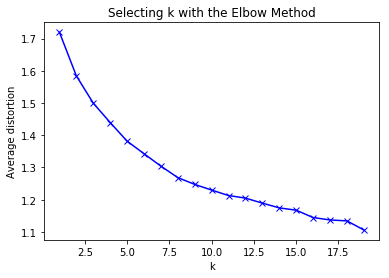

In [152]:
K = range(1, 20) 
meandistortions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

    -The elbow seems to appear at 6 to 7. I will go with 6 for the sake of simplicity.

In [146]:
k_means = KMeans(init='k-means++', n_clusters=6, random_state=0)
k_means.fit(df_norm)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [154]:
# cluster labels
k_means.labels_

array([1, 1, 1, ..., 4, 2, 5], dtype=int32)

In [155]:
#cluster centroids or centers
k_means.cluster_centers_

array([[-2.36696097e-02, -1.47692174e-04, -1.53471760e-02,
         8.84597315e-03, -1.45934075e-02, -1.13260505e-03,
         2.05828975e-02, -2.20579133e-01, -1.54380078e-01,
        -4.49014676e-02,  3.59179014e-02,  1.43503158e-01,
        -9.89000835e-02, -5.98326879e-03,  1.61434675e-01,
        -1.05186558e-01, -3.92377685e-02, -2.57003341e-04,
         1.60872541e-02, -4.95958695e-02,  2.97835108e-02,
         2.24276324e-03, -3.28155727e-02,  2.26212993e-01,
        -1.00044566e-01, -5.14006682e-04,  3.95871776e-02,
        -1.91787059e-01, -4.36039376e-04, -5.94669154e-03,
        -8.21296714e-04, -5.88470697e-04, -4.77636378e-02,
        -4.36905680e-03, -2.21388646e-02, -2.57003341e-04,
        -5.14006682e-04, -1.54202005e-03, -9.54570087e-03,
        -1.46785485e-01,  6.54183235e-01, -7.71010023e-04,
        -4.46414803e-01, -6.16808019e-03, -2.57003341e-03],
       [ 9.15709032e-02,  2.01862390e-02,  4.25675964e-02,
        -2.98108532e-03,  4.96431933e-02,  3.60417175e-

In [156]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [157]:
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [158]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,imdb_tier,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,cluster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,"(7.3, 9.3]",5,0,0,0,0,0,0,0,1,0,0,0,0,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,"(6.8, 7.3]",4,0,0,0,0,0,0,0,1,0,0,0,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,96554.0,-18.337071,"(6.3, 6.8]",3,0,0,0,0,0,0,0,1,0,0,0,0,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,259000.0,79.252257,"(7.3, 9.3]",5,0,0,0,0,0,0,0,1,0,0,0,0,1
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,26277.0,-72.294775,"(6.3, 6.8]",3,0,0,0,0,0,0,0,1,0,0,0,0,1


In [160]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,144.014981,109.852684,752.791511,829.614232,8259.870162,4.625012e+07,76650.384519,12077.575531,1.758750,253.481898,3.137494e+07,2005.057428,1926.265918,6.318851,7952.378277,0.028714,0.049938,0.006242,0.098627,0.531835,0.086142,0.011236,0.665418,0.011236,0.093633,0.00000,0.0,0.056180,0.052434,0.071161,0.028714,0.067416,0.0,0.0,0.454432,0.028714,0.000000,0.078652,0.098627,0.041199,0.009988,19720.920100,102.000337,2.749064,0.000000,0.001248,0.000000,0.000000,0.000000,0.001248,0.001248,0.996255,0.000000,0.000000,0.000000,0.000000
1,237.977391,115.871528,909.479167,1218.446957,9353.678819,9.722807e+07,174512.392361,14833.817708,1.251309,578.454861,8.923704e+07,2004.664931,2864.360000,6.225521,17280.027778,0.815972,0.565972,0.010417,0.006944,0.147569,0.184028,0.001736,0.196181,0.013889,0.190972,0.00000,0.0,0.019097,0.104167,0.003472,0.001736,0.137153,0.0,0.0,0.072917,0.397569,0.000000,0.008681,0.607639,0.017361,0.019097,31642.453913,68.849955,2.609375,0.010417,0.001736,0.001736,0.001736,0.000000,0.001736,0.053819,0.909722,0.000000,0.015625,0.000000,0.001736
2,145.031746,118.231990,834.455433,588.735618,6847.335775,2.527381e+07,93499.019536,9903.815629,1.436430,289.282051,4.442246e+07,2001.219780,1781.978022,7.028694,8131.650794,0.062271,0.063492,0.004884,0.150183,0.327228,0.134310,0.008547,0.998779,0.010989,0.032967,0.00000,0.0,0.098901,0.014652,0.069597,0.019536,0.025641,0.0,0.0,0.329670,0.028083,0.000000,0.053724,0.008547,0.108669,0.024420,18210.190942,293.538592,3.750916,0.002442,0.017094,0.000000,0.001221,0.003663,0.025641,0.111111,0.000000,0.000000,0.793651,0.018315,0.001221
3,149.065173,100.248980,441.384929,500.418557,4802.254098,3.501579e+07,89709.466395,7404.295316,1.539715,300.855397,2.267910e+07,2002.081466,1370.901437,6.241548,6771.272912,0.175153,0.077393,0.006110,0.018330,0.637475,0.105906,0.081466,0.004073,0.000000,0.107943,0.00000,0.0,0.008147,0.285132,0.028513,0.034623,0.075356,0.0,0.0,0.175153,0.114053,0.002037,0.022403,0.032587,0.016293,0.020367,13994.969072,2723.165405,2.627291,0.012220,0.008147,0.000000,0.000000,0.006110,0.024440,0.000000,0.000000,0.004073,0.875764,0.016293,0.012220
4,175.709389,110.682563,1018.152012,596.493294,8687.606557,3.341661e+07,100191.138599,12197.269747,1.064083,337.426230,3.063427e+07,2002.713860,2044.299553,6.528018,8276.658718,0.363636,0.055142,0.002981,0.034277,0.068554,0.532042,0.000000,0.596125,0.001490,0.037258,0.00149,0.0,0.016393,0.192250,0.002981,0.001490,0.265276,0.0,0.0,0.073025,0.116244,0.000000,0.002981,0.994039,0.029806,0.008942,20623.210134,345.597191,2.947839,0.000000,0.000000,0.000000,0.000000,0.000000,0.008942,0.005961,0.007452,0.000000,0.965723,0.001490,0.002981
5,136.804878,98.575985,618.953096,818.409774,6950.266417,8.497321e+07,92654.157598,10647.318949,1.112782,236.921201,5.873978e+07,2002.645403,1818.448405,6.192871,6932.919325,0.180113,0.566604,0.335835,0.011257,0.699812,0.048780,0.018762,0.178236,0.799250,0.425891,0.00000,0.0,0.007505,0.026266,0.054409,0.084428,0.039400,0.0,0.0,0.144465,0.172608,0.001876,0.050657,0.020638,0.003752,0.013133,17163.984962,212.936561,2.617261,0.005629,0.133208,0.000000,0.000000,0.000000,0.001876,0.842402,0.007505,0.001876,0.000000,0.000000,0

In [159]:
df2.groupby('cluster').size()

cluster
0    801
1    576
2    819
3    491
4    671
5    533
dtype: int64

 - Profiles will be made from Agglomerative Clustering. Dendograms (trees) have proven most successful during this assigment with accurate modeling.

### 8.2 Clustering Analysis using Agglomerative Clustering

In [161]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [164]:
df2 = df.drop(['News', 'Reality-TV', 'color', 'director_name', 'Game-Show', 'imdb_score', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 
               'actor_1_name', 'movie_title', 'cast_total_facebook_likes', 'actor_3_name', 'language', 'actor_2_facebook_likes', 'movie_facebook_likes', 'imdb_tier', 'gross'], axis =1)

In [165]:
df2['facebook_likes'] = df2['facebook_likes'].convert_objects(convert_numeric=True)
df2['roi'] = df2['roi'].convert_objects(convert_numeric=True)
df2.head(2)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,num_critic_for_reviews,duration,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,723.0,178.0,886204,0.0,3054.0,237000000.0,2009.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,5,0,0,0,0,0,0,0,1,0,0,0,0
1,302.0,169.0,471220,0.0,1238.0,300000000.0,2007.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,4,0,0,0,0,0,0,0,1,0,0,0,0


In [166]:
# Normalize the data
df_norm = (df2 - df2.mean()) / (df2.max() - df2.min())
df_norm.head()

,num_critic_for_reviews,duration,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,0.689366,0.230080,0.463747,-0.032091,0.538978,0.015701,0.061651,0.750707,0.795682,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,0.867129,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,0.871241,-0.000514,-0.039065,-0.290414,-0.041635,-0.015934,0.023703,-0.000423,0.51497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257
1,0.170893,0.199674,0.218159,-0.032091,0.180014,0.020858,0.040818,0.750707,0.795682,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,0.867129,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,-0.128759,-0.000514,-0.039065,-0.290414,-0.041635,-0.015934,0.040141,-0.000726,0.26497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257
2,0.540351,0.128728,0.102550,-0.008835,0.131783,0.016355,0.124151,0.750707,0.795682,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,-0.132871,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,-0.128759,-0.000514,-0.039065,0.709586,-0.041635,-0.015934,0.116431,-0.000756,0.01497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257
3,0.800204,0.182782,0.616510,-0.032091,0.469201,0.016765,0.092901,0.750707,-0.204318,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,-0.132871,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,-0.128759,-0.000514,-0.039065,0.709586,-0.041635,-0.015934,0.364334,-0.000620,0.51497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257
4,0.367938,0.074674,0.064874,-0.008835,0.081180,0.017886,0.092901,0.750707,0.795682,-0.051144,-0.062709,-0.388332,-0.185042,-0.017219,-0.503984,-0.116423,-0.132871,-0.000257,-0.040093,-0.10203,-0.041378,-0.026471,-0.100231,-0.228219,0.871241,-0.000514,-0.039065,-0.290414,-0.041635,-0.015934,0.009184,-0.000831,0.01497,-0.004369,-0.023387,-0.000257,-0.000514,-0.001542,-0.010794,-0.148034,0.657929,-0.000771,-0.446415,-0.006168,-0.00257


In [167]:
df_norm.isnull().any()
df_norm= df_norm.fillna(method='ffill')

In [169]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm)
agg.labels_

array([4, 4, 4, ..., 1, 3, 3])

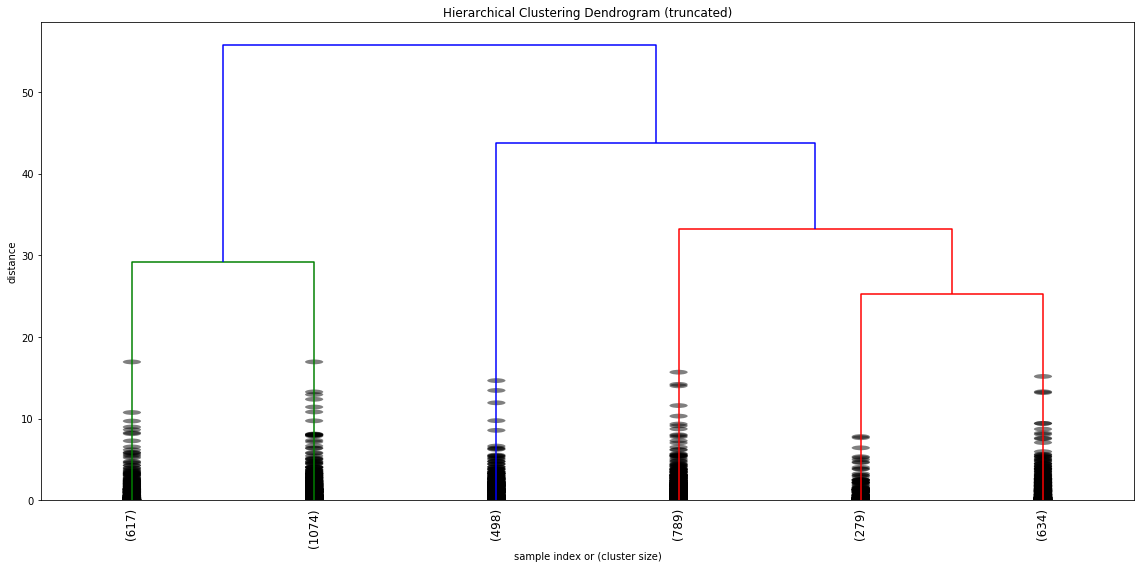

In [173]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(df_norm)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=6,  # show only the last p merged clusters
           show_leaf_counts=True,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

    - The dendogram shows how these clusters provide adequate space and enough variation from one another. Profile analysis should back
    this

In [174]:
# Creating a dataframe so that I can join my data and see the details of my clusters.
df6 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df6.head()

,cluster
0,4
1,4
2,4
3,4
4,4


In [175]:
df7 = df.join(df6)
df7.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,imdb_tier,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,cluster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,35791.0,220.888543,"(7.3, 9.3]",5,0,0,0,0,0,0,0,1,0,0,0,0,4
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46563.0,3.134717,"(6.8, 7.3]",4,0,0,0,0,0,0,0,1,0,0,0,0,4
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,96554.0,-18.337071,"(6.3, 6.8]",3,0,0,0,0,0,0,0,1,0,0,0,0,4
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,259000.0,79.252257,"(7.3, 9.3]",5,0,0,0,0,0,0,0,1,0,0,0,0,4
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,26277.0,-72.294775,"(6.3, 6.8]",3,0,0,0,0,0,0,0,1,0,0,0,0,4


In [176]:
df7.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,facebook_likes,roi,category,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,156.351955,112.399441,776.393855,671.506058,7306.034451,2.916922e+07,102841.395717,10710.259777,1.574488,303.559590,3.016963e+07,2003.127561,1925.654562,6.748976,9196.665736,0.130354,0.070764,0.004655,0.094041,0.489758,0.175978,0.003724,0.702980,0.001862,0.046555,0.000000,0.0,0.065177,0.016760,0.009311,0.003724,0.066108,0.0,0.0,0.264432,0.056797,0.000000,0.029795,0.195531,0.090317,0.024209,19881.259087,175.289385,3.325885,0.000931,0.001862,0.000000,0.000000,0.000931,0.002793,0.000000,0.000000,0.000000,0.988827,0.000000,0.000931
1,186.142626,108.366288,945.902755,533.115073,7789.653160,3.585131e+07,105974.512156,11115.604538,0.894652,384.554295,5.067314e+07,2002.395462,1940.622366,6.398217,7662.191248,0.393841,0.068071,0.003241,0.006483,0.017828,0.495948,0.000000,0.406807,0.001621,0.084279,0.001621,0.0,0.003241,0.398703,0.001621,0.001621,0.252836,0.0,0.0,0.055105,0.162075,0.000000,0.004862,0.763371,0.009724,0.008104,18871.484603,1966.898666,2.763371,0.000000,0.000000,0.000000,0.000000,0.000000,0.009724,0.001621,0.000000,0.000000,0.982172,0.000000,0.000000
2,142.783133,99.186747,690.895582,847.297787,7324.317269,8.861109e+07,97997.429719,11195.008032,1.098592,254.066265,6.416762e+07,2002.226908,1925.000000,6.157229,7334.006024,0.248996,0.654618,0.355422,0.004016,0.688755,0.052209,0.002008,0.120482,0.746988,0.435743,0.000000,0.0,0.006024,0.014056,0.034137,0.076305,0.048193,0.0,0.0,0.144578,0.212851,0.000000,0.030120,0.074297,0.004016,0.012048,18150.183099,156.352892,2.572289,0.000000,0.130522,0.000000,0.000000,0.000000,0.002008,0.855422,0.000000,0.002008,0.000000,0.000000,0.000000
3,126.769328,113.833756,794.816223,561.143223,5912.633588,3.697299e+07,63107.163498,8650.993663,1.571792,216.337136,2.474198e+07,2002.191381,1450.550318,6.713561,7125.888466,0.026616,0.031686,0.007605,0.164766,0.389100,0.040558,0.078580,0.842839,0.083650,0.064639,0.000000,0.0,0.091255,0.002535,0.163498,0.067174,0.000000,0.0,0.0,0.401774,0.010139,0.002535,0.108999,0.026616,0.057034,0.007605,15941.803069,613.755174,3.325729,0.010139,0.029151,0.000000,0.001267,0.005070,0.032953,0.179975,0.586819,0.002535,0.086185,0.025349,0.001267
4,233.145340,114.981073,830.000000,1251.137441,9744.984227,8.891613e+07,165099.225552,15234.216088,1.182250,546.960568,7.779195e+07,2005.129338,2879.205371,6.305363,16795.594637,0.574132,0.458991,0.007886,0.011041,0.083596,0.165615,0.000000,0.362776,0.017350,0.203470,0.000000,0.0,0.012618,0.194006,0.003155,0.006309,0.206625,0.0,0.0,0.123028,0.320189,0.000000,0.004732,0.578864,0.017350,0.025237,31515.601896,97.467889,2.736593,0.012618,0.001577,0.001577,0.001577,0.001577,0.009464,0.011041,0.929022,0.000000,0.001577,0.006309,0.012618
5,120.082437,100.086022,448.752688,799.713262,8470.114695,5.567792e+07,71852.856631,12201.261649,2.111111,237.569892,4.103477e+07,2003.810036,1693.860215,5.707885,3687.071685,0.279570,0.125448,0.014337,0.000000,0.971326,0.222222,0.000000,0.000000,0.003584,0.064516,0.000000,0.0,0.003584,0.003584,0.007168,0.010753,0.028674,0.0,0.0,0.369176,0.082437,0.000000,0.046595,0.086022,0.003584,0.010753,15099.512545,66.252967,1.874552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00

In [177]:
df7.groupby('cluster').size()

cluster
0    1074
1    617 
2    498 
3    789 
4    634 
5    279 
dtype: int64

### 8.3 Profiles from Agglomerative Clustering:
    -Profiles
        0 = Decade Classics - Lowest gross earnings (but accumulated over time), but the 3rd highest roi. With mid-level interactions (facebook likes, reviews, etc.) they fair well with one of the smaller budget which usually means less promotion. However, averaging category 3.3 (5 categories) means their imdb score falls a little above average. These seem to be R-rated dramas with comedy as well. Examples are "Friday", "Jerry McGuire", "The Breakfast Club" 
        1 = Crime Mines - A huge return on investment witha lower than average imdb score. Crime, Horror, mystery shows with an R ratings. These shows include "Scream", "Paranormal Activity"
        2 = Kiddy Time - The high family scores give these PG/G shows the money they ask for. However, a low rating shows these do not become a classic. They are simple scripted movies simply made to bring out a laugh. "Emoji Movie"
        3 = Rom-Com Classics - These boast the highest average of romance and comedy and offer above average imdb scores. Not to mention, the second highest roi. Lowest facebook likes indicates these came out before social media had taken off. "The Notebook", "Love, Actually"
        4 = Modern Day Box Office - Having the largest budgets and generating the smallest amount of return. These include the highest amount of sci-fi, latest average release date, highest interactions. This means they are paying big actors and making safe profits. Think Marvel and Disney with these.
        5 = Comedy croaks - The lowest imdb ratings, highest comedy average, and straight PG-13. Return on investment is the lowest but the cast is well received on facebook. Think of "Disaster Movie", "Meet the Spartans", "Son of the Mask". Great cast, simple plot, just looking for laughs.
        

## 9. Storytelling
    - Social media interactions are critical for a movie to have success in the current industry. As are big stars. This word-of-mouth
    is essential for the consumers to feel a part of the film and develop a heart loyalty to it. This leads to higher
    reviews and higher earnings. It is too late to become a classic, you must become a hit right out of the gate.
    - Head loyalty is seen in the form of high-rated actors starring as the lead in acclaimed movies. Tom Hanks, Johnny
    Depp and Harrison Ford are just a few examples of this. Although many people will not have specific likings to them,
    they will go because they recognize the name. Of course, there are those that have heart loyalty to these actors which
    is the ultimate goal. This is allows for the culmination of a film such as Avengers, the highest grossing film on the 
    list. It also allows comedies, as seen with cluster 5, to be profitable even with a poor imdb score.
    - The film industry is experiencing changes from the film screen to streaming devices right now. For this reason, 
    encouraging apps such as the imdb app, or the use of facebook as earlier discussed will be important for a movie company
    to remain competitive in the market.
    - Blockbuster movies are making more money than they ever have. The budgets are ballooning as well. As an investor,
    it would be worth looking at movies that cross generations. Avatar was the only movie that was a recent concept. 
    Movies like Alice in Wonderland, Avengers, and SpiderMan have been around for years. A study that determines what
    a customer feels motivated by to watch a movie would be helpful to stimulate demand and acquire and retain customers. 
    - Do predict what a great movie will be in today's current age involves, looking to see if it is a drama, has a high budget
    , long run time, high social media interaction, having a couple stars in the movie poster helps. However, it is clear to see
    that successful clusters of movies are developed. This include post-screening data such as earnings and reviews. As the film 
    industry opens across the world, this is important for investors.
    A few simple tips:
        For a director- If you want to have a hit, find a Gal Gadot or Harrison Ford and have a sci-fi drama. 
        For an investor- If you want to make money and miniize risk, then invest in Disney or Marvel.
        For you- If you want to enjoy a movie, go watch a comedy with your favorite actor.
    Questions:
    - How might we be able to find up and coming stars to rally behind as investors? For example, who will be
    the next Harrison Ford? By joining a different dataset, would we find a correlation between sequels or remakes?
    Is there a specific season, rather than year, that movies are better recepted at the box office?
    Applications:
    - Given a dataset of unreleased movies, we could develop a model to predict whether or not the movie could do well.
    In this model, interactions would be incredibly important, as well as the lead cast. I tried to scrape new data, but failed
    miserably. It is the first of many attempts, but for now I had to live with a seemingly acceptable model. 